In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-dataset/diabetes_dataset.csv


## 1. About the Dataset

Diabetes Diagnosis Dataset

This dataset contains 9,538 medical records related to diabetes diagnosis and risk factors. It includes various health parameters, lifestyle habits, and genetic predispositions that contribute to diabetes risk. The data is structured with realistic distributions, making it valuable for medical research, statistical analysis, and machine learning applications.

- **Age**: The age of the individual (18-90 years).

- **Pregnancies**: Number of times the patient has been pregnant.

- **BMI (Body Mass Index)**: A measure of body fat based on height and weight (kg/m²).

- **Glucose**: Blood glucose concentration (mg/dL), a key diabetes indicator.

- **BloodPressure**: Systolic blood pressure (mmHg), higher levels may indicate hypertension.

- **HbA1c**: Hemoglobin A1c level (%), representing average blood sugar over months.

- **LDL (Low-Density Lipoprotein)**: "Bad" cholesterol level (mg/dL).

- **HDL (High-Density Lipoprotein)**: "Good" cholesterol level (mg/dL).

- **Triglycerides**: Fat levels in the blood (mg/dL), high values increase diabetes risk.

- **WaistCircumference**: Waist measurement (cm), an indicator of central obesity.

- **HipCircumference**: Hip measurement (cm), used to calculate WHR.

- **WHR (Waist-to-Hip Ratio)**: Waist circumference divided by hip circumference.

- **FamilyHistory**: Indicates if the individual has a family history of diabetes (1 = Yes, 0 = No).

- **DietType**: Dietary habits (0 = Unbalanced, 1 = Balanced, 2 = Vegan/Vegetarian).

- **Hypertension**: Presence of high blood pressure (1 = Yes, 0 = No).

- **MedicationUse**: Indicates if the individual is taking medication (1 = Yes, 0 = No).

- **Outcome**: Diabetes diagnosis result (1 = Diabetes, 0 = No Diabetes).

This dataset is useful for exploring the relationships between lifestyle choices, genetic factors, and diabetes risk, providing valuable insights for predictive modeling and health analytics.

## 2. Statement of the Problem

Diabetes is a chronic condition that affects millions of people worldwide. Early detection and intervention can significantly improve health outcomes and reduce complications. This project aims to develop a machine learning model to predict whether an individual has diabetes based on various medical, genetic, and lifestyle features.

Using the Diabetes Diagnosis Dataset, we will apply classification algorithms to identify patterns in key risk factors such as glucose levels, BMI, blood pressure, cholesterol levels, family history, and lifestyle choices. The objective is to build a robust predictive model that can assist in early diagnosis and risk assessment, potentially aiding healthcare professionals in making data-driven decisions.

1. **Importing the necessary Libraries**
3. **Exploratory Data Analysis**: Understanding the distribution of features, handling missing values, and visualizing correlations.
4. **Feature Engineering**: Feature scaling, encoding categorical variables, and balancing the dataset if needed.
5. **Model Selection** Comparing different classification algorithms (e.g., Logistic Regression, Random Forest
6. **Training the model**
7. **Evaluating the model**: we will use accuracy scores and confusoin matrices to evaluate the performance of our models

## 3. Importing Libraries and Loading the Dataset

The next step in this process of to import the libraries that we will need to perform data cleaning, create, train and evaluate our model. We will be using matplotlib.pyplot and seaborn for data visualization, numpy to perform vectorized calculations, whilee scikit learn will provide us with all the models and their evaluation metrics.

In [3]:
# import libraries

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [4]:
# load the dataset

df = pd.read_csv('/kaggle/input/diabetes-dataset/diabetes_dataset.csv')
df.head()

,Age,Pregnancies,BMI,Glucose,BloodPressure,HbA1c,LDL,HDL,Triglycerides,WaistCircumference,HipCircumference,WHR,FamilyHistory,DietType,Hypertension,MedicationUse,Outcome
0,69,5,28.39,130.1,77.0,5.4,130.4,44.0,50.0,90.5,107.9,0.84,0,0,0,1,0
1,32,1,26.49,116.5,72.0,4.5,87.4,54.2,129.9,113.3,81.4,1.39,0,0,0,0,0
2,89,13,25.34,101.0,82.0,4.9,112.5,56.8,177.6,84.7,107.2,0.79,0,0,0,1,0
3,78,13,29.91,146.0,104.0,5.7,50.7,39.1,117.0,108.9,110.0,0.99,0,0,0,1,1
4,38,8,24.56,103.2,74.0,4.7,102.5,29.1,145.9,84.1,92.8,0.91,0,1,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9538 entries, 0 to 9537
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 9538 non-null   int64  
 1   Pregnancies         9538 non-null   int64  
 2   BMI                 9538 non-null   float64
 3   Glucose             9538 non-null   float64
 4   BloodPressure       9538 non-null   float64
 5   HbA1c               9538 non-null   float64
 6   LDL                 9538 non-null   float64
 7   HDL                 9538 non-null   float64
 8   Triglycerides       9538 non-null   float64
 9   WaistCircumference  9538 non-null   float64
 10  HipCircumference    9538 non-null   float64
 11  WHR                 9538 non-null   float64
 12  FamilyHistory       9538 non-null   int64  
 13  DietType            9538 non-null   int64  
 14  Hypertension        9538 non-null   int64  
 15  MedicationUse       9538 non-null   int64  
 16  Outcom

In [9]:
df.shape

(9538, 17)

As described earlier, the data set contains 16 features and 1 label (target variable). There are 9538 instances of the data, i.e. there are such many inputs. From the .info() method above we can see that there are no missing values in the dataset. to be sure, we will check all null values in the data frame. We will also check to see if there are any duplicated values. We can also see that the data types are of the correct dtypes so we do not have to format the column data types.

In [6]:
df.isnull().sum()

Age                   0
Pregnancies           0
BMI                   0
Glucose               0
BloodPressure         0
HbA1c                 0
LDL                   0
HDL                   0
Triglycerides         0
WaistCircumference    0
HipCircumference      0
WHR                   0
FamilyHistory         0
DietType              0
Hypertension          0
MedicationUse         0
Outcome               0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [8]:
df.describe()

,Age,Pregnancies,BMI,Glucose,BloodPressure,HbA1c,LDL,HDL,Triglycerides,WaistCircumference,HipCircumference,WHR,FamilyHistory,DietType,Hypertension,MedicationUse,Outcome
count,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000
mean,53.577584,7.986161,27.052364,106.104183,84.475781,4.650661,100.133456,49.953418,151.147746,93.951678,103.060621,0.917400,0.302474,0.486161,0.001048,0.405012,0.344097
std,20.764651,4.933469,5.927955,21.918590,14.123480,0.476395,29.911910,15.242194,48.951627,15.594468,13.438827,0.140828,0.459354,0.661139,0.032364,0.490920,0.475098
min,18.000000,0.000000,15.000000,50.000000,60.000000,4.000000,-12.000000,-9.200000,50.000000,40.300000,54.800000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,4.000000,22.870000,91.000000,74.000000,4.300000,80.100000,39.700000,117.200000,83.400000,94.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,53.000000,8.000000,27.050000,106.000000,84.000000,4.600000,99.900000,50.200000,150.550000,93.800000,103.200000,0.910000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,72.000000,12.000000,31.180000,121.000000,94.000000,5.000000,120.200000,60.200000,185.100000,104.600000,112.100000,1.010000,1.000000,1.000000,0.000000,1.000000,1.000000
max,89.000000,16.000000,49.660000,207.200000,138.000000,6.900000,202.200000,107.800000,345.800000,163.000000,156.600000,1.490000,1.000000,2.000000,1.000000,1.000000,1.000000


## 4. EDA

Next, we will perform some exploratory data analysis to determine the relationships between our target variable, the outcome and the features in the dataset. This is import to better understand what features are important in predicting the outcome. We do not want to use features that do not contribute to the outcome and thus not only eat into computation time but will make our model underfit on the training data.

First, we split our columns into numerical and categorical columns.

In [11]:
df.columns

Index(['Age', 'Pregnancies', 'BMI', 'Glucose', 'BloodPressure', 'HbA1c', 'LDL',
       'HDL', 'Triglycerides', 'WaistCircumference', 'HipCircumference', 'WHR',
       'FamilyHistory', 'DietType', 'Hypertension', 'MedicationUse',
       'Outcome'],
      dtype='object')

In [12]:
#numerical columns
num_cols = ['Age', 'Pregnancies', 'BMI', 'Glucose', 'BloodPressure', 'HbA1c', 
                  'LDL', 'HDL', 'Triglycerides', 'WaistCircumference', 'HipCircumference', 'WHR'] 

# categorical columns
cat_cols = ['FamilyHistory', 'DietType', 'Hypertension', 'MedicationUse', 'Outcome']

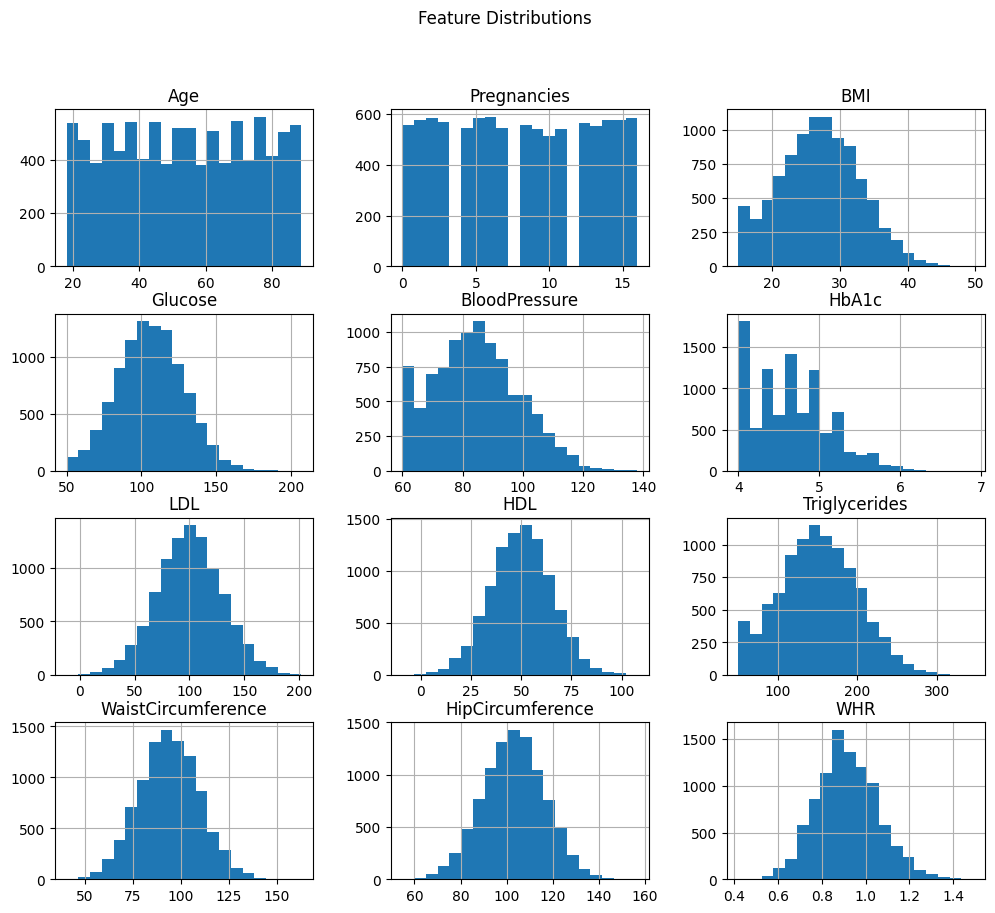

In [19]:
# Distribution of Numerical Variables

df[num_cols].hist(figsize=(12, 10), bins=20)
plt.suptitle("Feature Distributions")
plt.show()

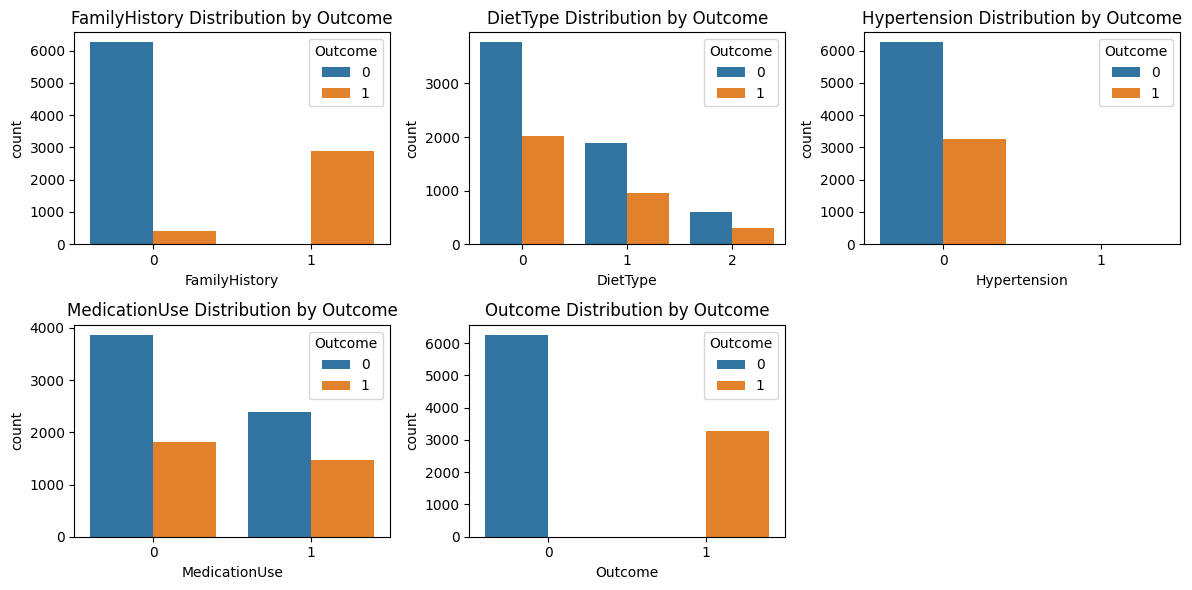

In [14]:
# Countplots for Categorical Variables
plt.figure(figsize=(12, 6))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=col, hue='Outcome')
    plt.title(f"{col} Distribution by Outcome")
plt.tight_layout()
plt.show()

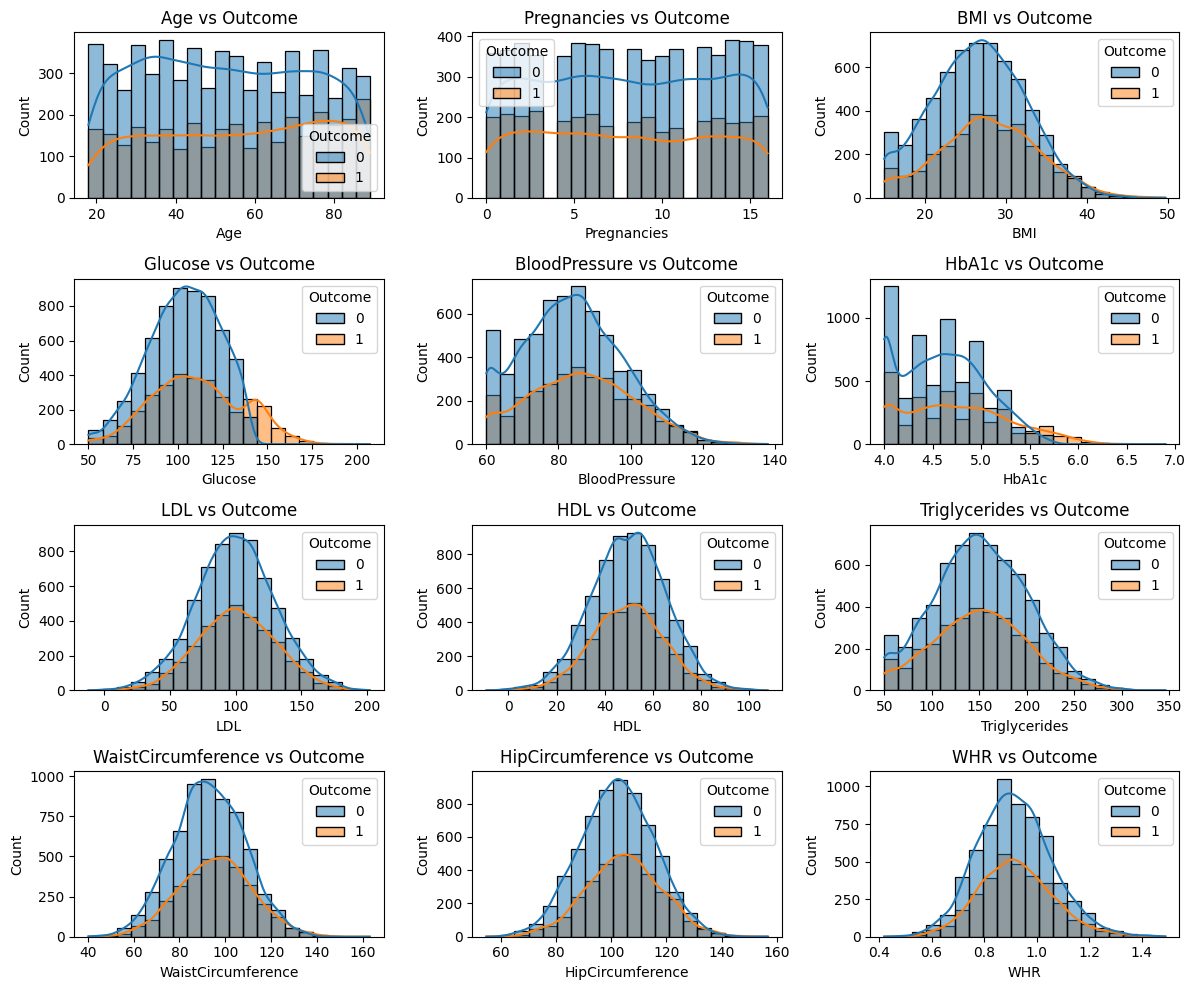

In [15]:
# Relationship between Outcome and numerical features
plt.figure(figsize=(12, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 3, i)
    sns.histplot(data=df, x=col, hue='Outcome', kde=True, bins=20)
    plt.title(f"{col} vs Outcome")
plt.tight_layout()
plt.show()

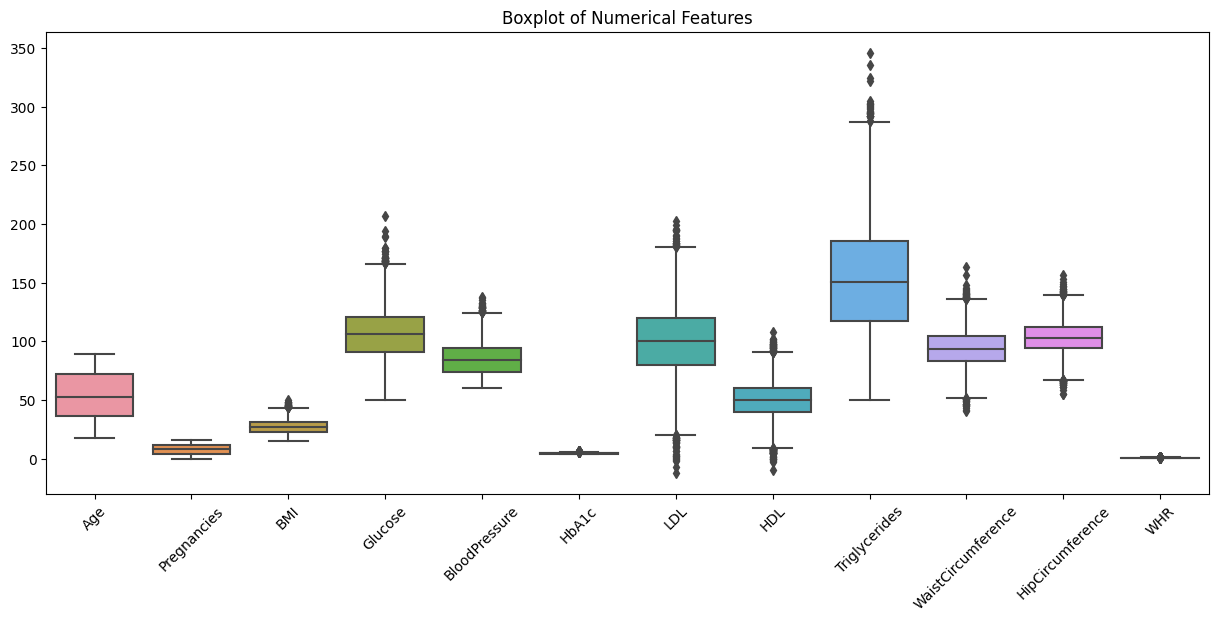

In [16]:
# Boxplot for numerical features
plt.figure(figsize=(15, 6))
sns.boxplot(data=df[num_cols])
plt.xticks(rotation=45)
plt.title("Boxplot of Numerical Features")
plt.show()

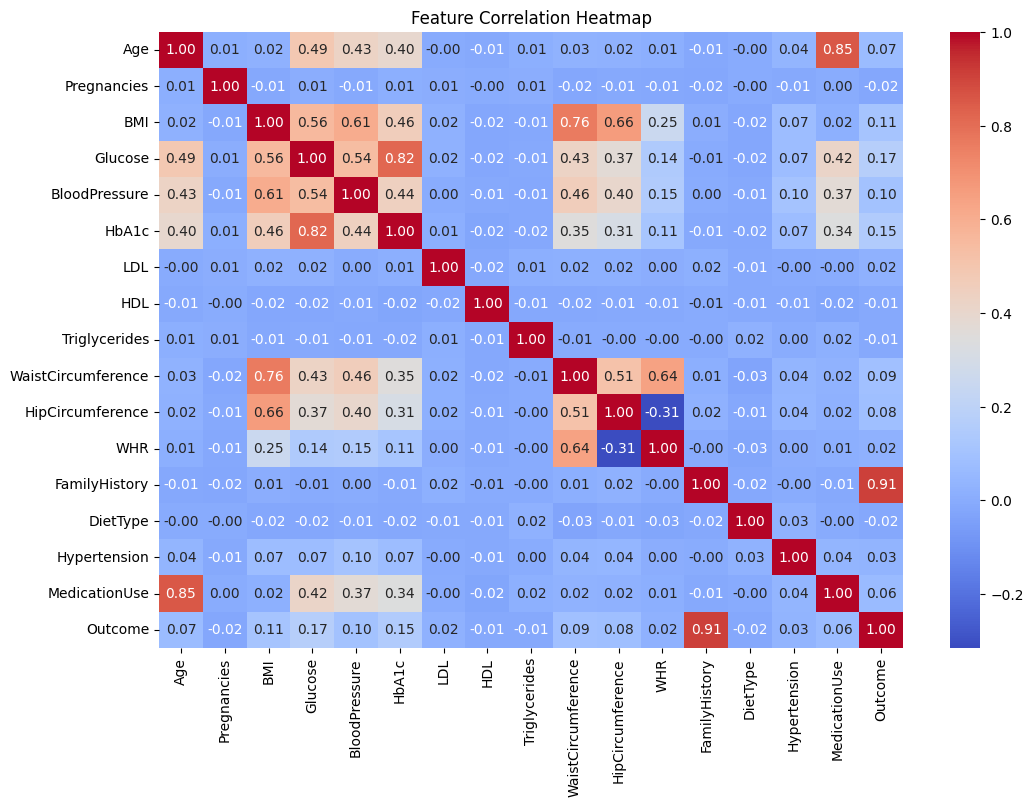

In [17]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

## 5. Model Selection

Now that we have a basic understanding of the data, it is time to choose the best model that can be used to predict the outcome of a health diagnosis based on pre exisiting conditions. First we will divide the data into features X, and target y, then split them into training and testing sets. Then we will scale the data since, there are outliers according to the boxplots of numerical variables in the EDA section. After scaling the data, we will choose the best model to train and use that for prediction. 

In [20]:
# Define features and target
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

## 6. Training and Evaluating Models

--- Logistic Regression ---
Accuracy: 0.9932
              precision    recall  f1-score   support

 No Diabetes       0.99      1.00      0.99      1275
    Diabetes       1.00      0.98      0.99       633

    accuracy                           0.99      1908
   macro avg       0.99      0.99      0.99      1908
weighted avg       0.99      0.99      0.99      1908



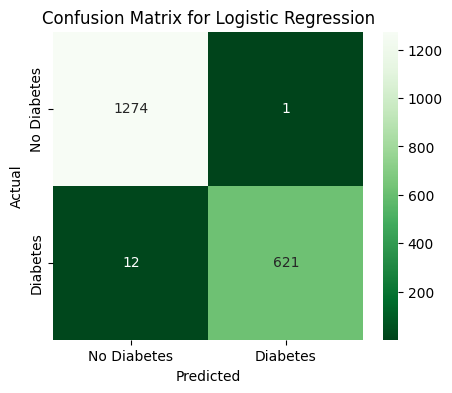



--- Random Forest ---
Accuracy: 1.0000
              precision    recall  f1-score   support

 No Diabetes       1.00      1.00      1.00      1275
    Diabetes       1.00      1.00      1.00       633

    accuracy                           1.00      1908
   macro avg       1.00      1.00      1.00      1908
weighted avg       1.00      1.00      1.00      1908



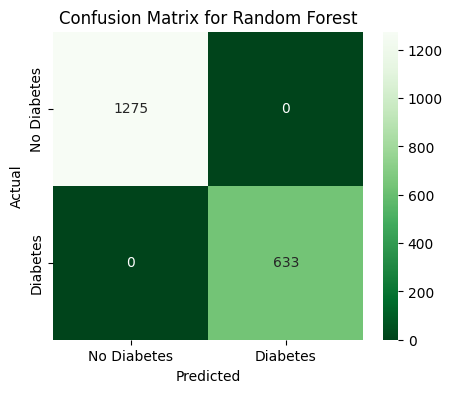



--- Support Vector Machine ---
Accuracy: 0.9869
              precision    recall  f1-score   support

 No Diabetes       0.98      1.00      0.99      1275
    Diabetes       0.99      0.97      0.98       633

    accuracy                           0.99      1908
   macro avg       0.99      0.98      0.99      1908
weighted avg       0.99      0.99      0.99      1908



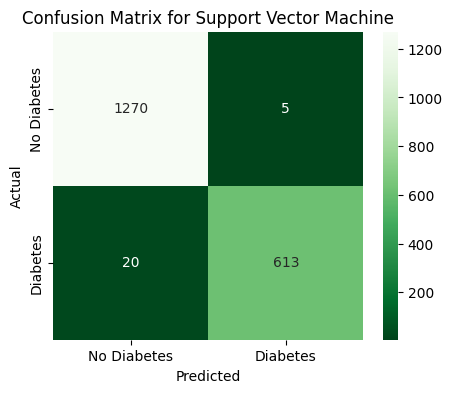



--- K-Nearest Neighbors ---
Accuracy: 0.9727
              precision    recall  f1-score   support

 No Diabetes       0.96      1.00      0.98      1275
    Diabetes       0.99      0.93      0.96       633

    accuracy                           0.97      1908
   macro avg       0.98      0.96      0.97      1908
weighted avg       0.97      0.97      0.97      1908



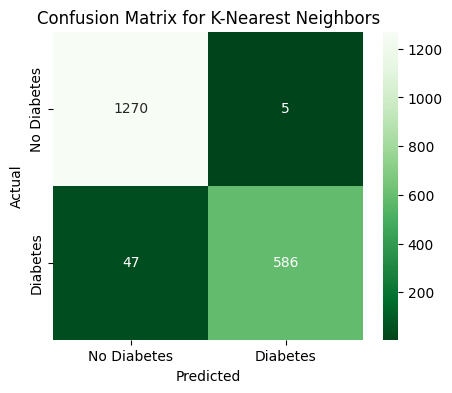



--- Decision Tree ---
Accuracy: 1.0000
              precision    recall  f1-score   support

 No Diabetes       1.00      1.00      1.00      1275
    Diabetes       1.00      1.00      1.00       633

    accuracy                           1.00      1908
   macro avg       1.00      1.00      1.00      1908
weighted avg       1.00      1.00      1.00      1908



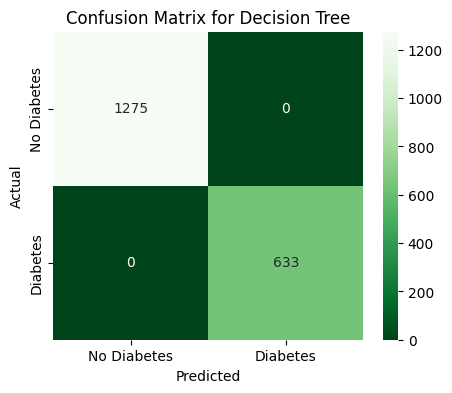

In [25]:
# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'--- {name} ---')
    print(f'Accuracy: {accuracy:.4f}')
    print(classification_report(y_test, y_pred, target_names=['No Diabetes', 'Diabetes']))
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens_r', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()
    print('\n')

Those are some very interesting results, especially for Random Forest. Will have to re examine the features to determine the issue.